Bayesian Classifier

In [16]:
# Naive Bayes

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
# Importing the dataset
dataset = pd.read_csv('dataset_class.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

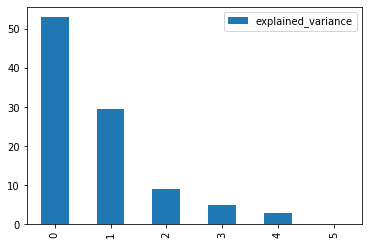

In [15]:
# Plotting PCA variance
#data
df_explained_variance = pd.DataFrame({'explained_variance': explained_variance * 100})

#plot
df_explained_variance.plot(kind = 'bar')
#plt.bar(df_explained_variance.index, df_explained_variance['explained_variance'])
plt.title = ('explained_variance')
plt.xlabel = ('Feature')
plt.ylabel = ('Percent')
plt.show()

In [21]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [23]:
# Predicting the Probabilities
y_prob = classifier.predict_proba(X_test) * 100
y_prob_train = classifier.predict_proba(X_train) * 100

In [25]:
# Creating probability data frames
df_prob_train = pd.DataFrame({'Prbability_Poor': y_prob_train[:, 0], 'Prbability_Avg': y_prob_train[:, 1], 'Prbability_Good': y_prob_train[:, 2]})
df_prob = pd.DataFrame({'Prbability_Poor': y_prob[:, 0], 'Prbability_Avg': y_prob[:, 1], 'Prbability_Good': y_prob[:, 2]})

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[9, 2, 0],
       [6, 2, 1],
       [5, 0, 3]], dtype=int64)

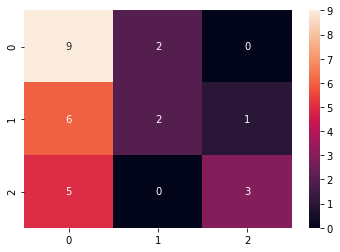

In [27]:
sns.heatmap(cm, annot = True)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3, 0, 0],
       [1, 1, 0],
       [2, 0, 0]], dtype=int64)

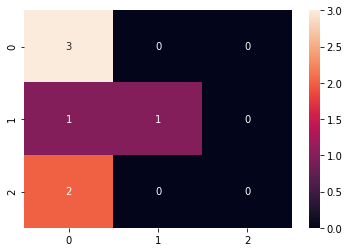

In [31]:
sns.heatmap(cm, annot = True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TypeError: 'str' object is not callable

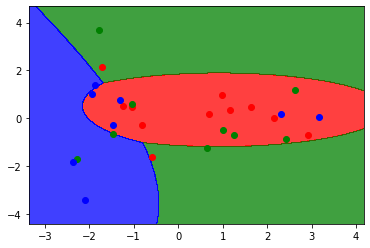

In [32]:
# Visualising the Training set results
labels=['Poor', 'Average', 'Good']
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j, in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = labels[j])
plt.title('Bayesian Network (Training set)')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TypeError: 'str' object is not callable

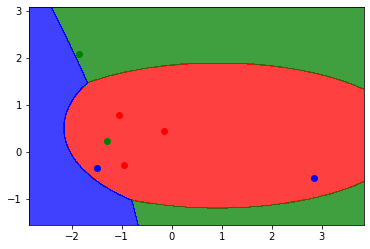

In [33]:
# Visualising the Test set results
labels=['Poor', 'Average', 'Good']
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = labels[j])
plt.title('Bayesian Network (Test set)')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_1')
plt.legend()
plt.show()

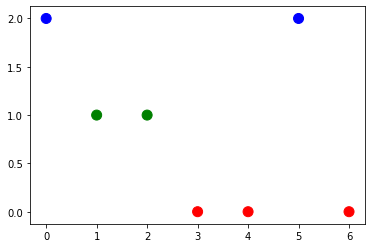

TypeError: 'str' object is not callable

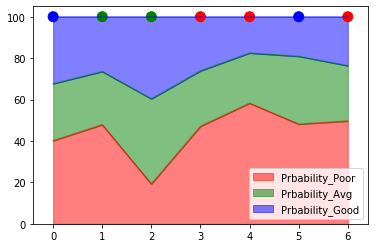

In [34]:
## Plotting Probabilities
# color of actual interval
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('green')
        else:
            cols.append('blue')
    return cols
# Create the colors list using the function above
cols=pltcolor(y_test)

y_test_plot = [100] * 7

plt.scatter(x=df_prob.index, y=y_test,s=100,c=cols) #Pass on the list created by the function here
plt.show()

# area map
df_prob.plot(kind='area', 
             stacked=True,
             alpha = 0.5,
             color=("red", "green", "blue"))
plt.scatter(x=df_prob.index, y=y_test_plot,s=100,c=cols) #Pass on the list created by the function here
plt.title('Probability -- Actual vs. Predicted')
plt.ylabel('Probability')
plt.xlabel('Well #')
plt.show()

TypeError: 'str' object is not callable

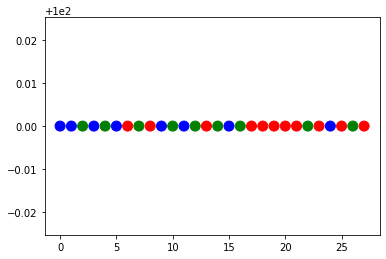

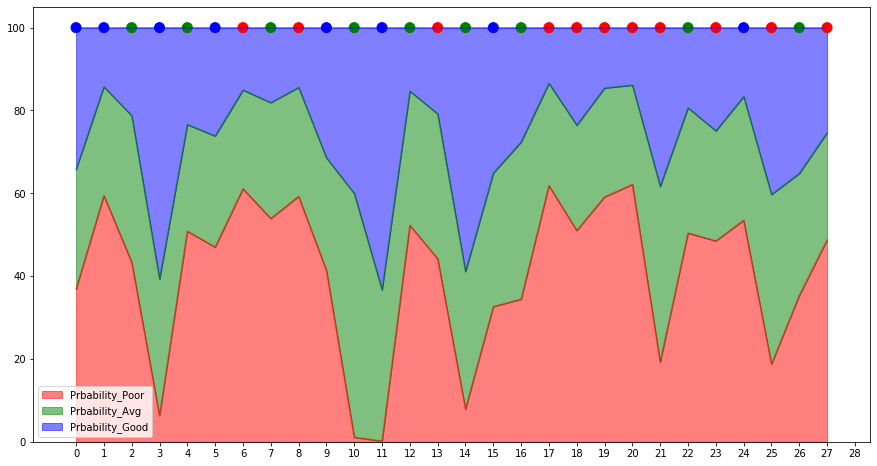

In [38]:
##### Create the colors list using the function above
cols=pltcolor(y_train)

y_train_plot = [100] * 28

plt.scatter(x=df_prob_train.index, y=y_train_plot,s=100,c=cols) #Pass on the list created by the function here
plt.show()

# area map
df_prob_train.plot(kind='area', 
             stacked=True,
             alpha = 0.5,
             figsize = (15,8),
             xticks = (np.arange(0, 29, step=1)),
             color=("red", "green", "blue"))
plt.scatter(x=df_prob_train.index, y=y_train_plot,s=100,c=cols) #Pass on the list created by the function here
plt.legend()
plt.title('Training Set Probability -- Actual vs. Predicted')
plt.ylabel('Probability')
plt.xlabel('Well #')
plt.show()

Artificial Neural Net

In [42]:
# Artificial Neural Network

# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install tensorflow
import tensorflow as tf
print(tf.__version__)
#from keras.datasets import imdb
#from keras.preprocessing.text import Tokenizer
#from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

2.2.0


In [43]:
# Importing the dataset
dataset = pd.read_csv('dataset_reg.csv')
dataset.describe()
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
# print(X)
# print(y)
dataset_statistics = dataset.describe()

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#print(X)

In [47]:
random_state = 23
## 4 (batch size = 2), 23, 24
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [48]:
#Inputs
input_size = 6
hidden_size = 6
output_size = 1
batch_size = 2
epochs_size = 10000

In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# ann = Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=input_size, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=hidden_size, activation='relu'))


# Adding the output layer
ann.add(tf.keras.layers.Dense(units=output_size, activation='linear'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

# Training the ANN on the Training set
ann_history = ann.fit(X_train, y_train, batch_size = batch_size, epochs = epochs_size, 
        validation_data = (X_test, y_test), callbacks=[es])

In [50]:
# Part 4 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred_train = ann.predict(X_train)

# Extract the weights and bias
weights = ann.layers[0].get_weights()[0]
# weights
bias = ann.layers[0].get_weights()[1]
# bias

In [51]:
########### Reading dataset again just for visualization purposes
########
# Importing the dataset
dataset = pd.read_csv('dataset_reg.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)


# Checking shape compatibility
# Training Set
X_train.shape
X_train[:, 0].shape

y_train.shape
y_train = np.reshape(y_train, (y_train.size, 1))
y_train[:, 0].shape

y_pred_train.shape
y_pred_train = np.reshape(y_pred_train, (y_pred_train.size, 1))
y_pred_train[:, 0].shape

# Test Set
X_test.shape
X_test[:, 0].shape

y_test.shape
y_test = np.reshape(y_test, (y_test.size, 1))
y_test[:, 0].shape

y_pred.shape
y_pred = np.reshape(y_pred, (y_pred.size, 1))
y_pred[:, 0].shape


(7,)

0.3494343745497954


TypeError: 'str' object is not callable

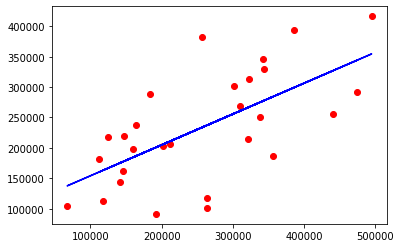

In [53]:
# Visualising the Model Accuracy - Training Set
from sklearn.metrics import r2_score
r2 = r2_score(y_train[:, 0], y_pred_train[:, 0])
print (r2)

x0 = y_train[:, 0]
y0 = y_pred_train[:, 0]
m, b = np.polyfit(x0, y0, 1)

plt.scatter(y_train[:, 0], y_pred_train[:, 0], color = 'red')
plt.plot(x0, m*x0 + b, color = 'blue')
plt.title('Model Accuracy (Training set)')
plt.xlabel('Np_Actual')
plt.ylabel('Np_Predicted')
plt.legend(['R2:  ' + str (round(r2, 3))])
plt.show()

0.28872367629871876


TypeError: 'str' object is not callable

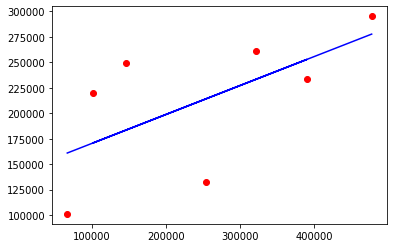

In [54]:
# Visualising the Model Accuracy - Test Set
from sklearn.metrics import r2_score
r2 = r2_score(y_test[:, 0], y_pred[:, 0])
print (r2)

x0 = y_test[:, 0]
y0 = y_pred[:, 0]
m, b = np.polyfit(x0, y0, 1)

plt.scatter(y_test[:, 0], y_pred[:, 0], color = 'red')
plt.plot(x0, m*x0 + b, color = 'blue')
plt.title('Model Accuracy (Test set)')
plt.xlabel('Np_Actual')
plt.ylabel('Np_Predicted')
plt.legend(['R2:  ' + str (round(r2, 3))])
plt.show()

TypeError: 'str' object is not callable

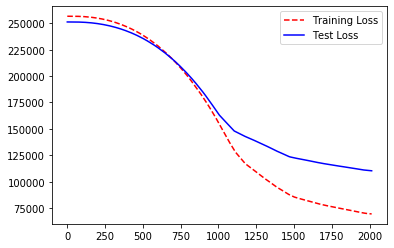

In [55]:
#Visualize Neural Net Loss History
# Get training and test loss histories
training_loss = ann_history.history['loss']
test_loss = ann_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

TypeError: 'str' object is not callable

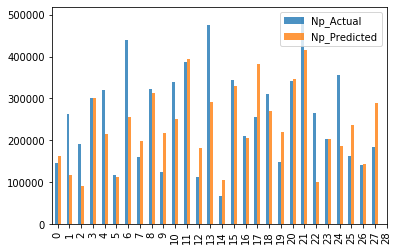

In [56]:
####Visualize Np bar chart --- Training Set
df_np_train = pd.DataFrame({'Np_Actual': y_train[:, 0], 'Np_Predicted': y_pred_train[:, 0]})
# df_np_train = df_np_train.sort_values(by = 'Np_Actual', ascending = True)
# df_np_train = df_np_train.reset_index(drop = True)

#plot
df_np_train.plot(kind = 'bar', alpha = 0.8, stacked = False, xticks = (np.arange(0, 29, step=1)))
plt.title('Np Actual vs. Predicted')
plt.xlabel('well#')
plt.ylabel('Np, STB')
plt.show()

[(-200000, 200000)]

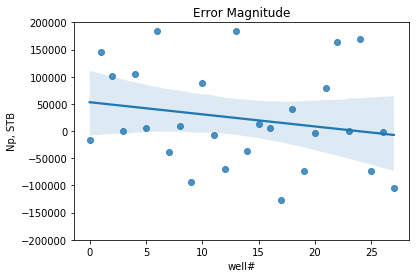

In [57]:
#calculate error
error_train = np.subtract(y_train[:, 0], y_pred_train[:, 0]) 
df_error_train = pd.DataFrame({'Training Error': error_train})

#plot
ax = sns.regplot(x= df_error_train.index, y= df_error_train)
ax.set(xlabel = 'well#', ylabel = 'Np, STB') # add label
ax.set_title('Error Magnitude')
ax.set(ylim=(-200000, 200000))

[(-100, 100)]

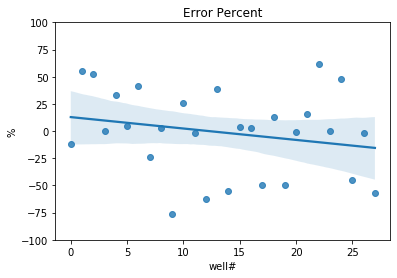

In [58]:
#calculate error percent
error_train_percent = ((y_train[:, 0] - y_pred_train[:, 0]) / y_train[:, 0]) * 100
df_error_train_percent = pd.DataFrame({'Training Error Percent': error_train_percent})

#plot
ax = sns.regplot(x= df_error_train_percent.index, y= df_error_train_percent)
ax.set(xlabel = 'well#', ylabel = '%') # add label
ax.set_title('Error Percent')
ax.set(ylim=(-100, 100))

TypeError: 'str' object is not callable

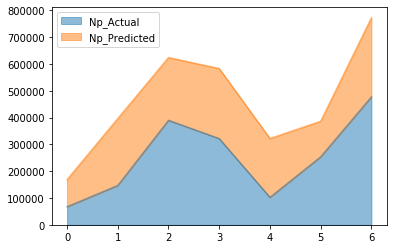

In [59]:
####Visualize Np bar chart --- Test Set
df_np_test = pd.DataFrame({'Np_Actual': y_test[:, 0], 'Np_Predicted': y_pred[:, 0]})

#plot
df_np_test.plot(kind = 'area', alpha = 0.5, stacked = True)
plt.title('Np Actual vs. Predicted')
plt.xlabel('well#')
plt.ylabel('Np, STB')
plt.show()

[(-400000, 400000)]

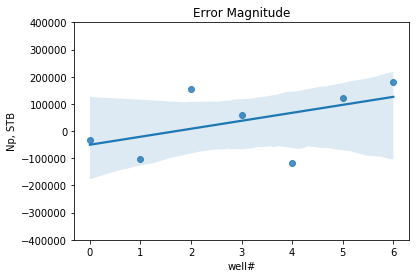

In [60]:
#calculate error
error_train = np.subtract(y_test[:, 0], y_pred[:, 0]) 
df_error_test = pd.DataFrame({'Test Error': error_train})

#plot
ax = sns.regplot(x= df_error_test.index, y= df_error_test)
ax.set(xlabel = 'well#', ylabel = 'Np, STB') # add label
ax.set_title('Error Magnitude')
ax.set(ylim=(-400000, 400000))

[(-200, 200)]

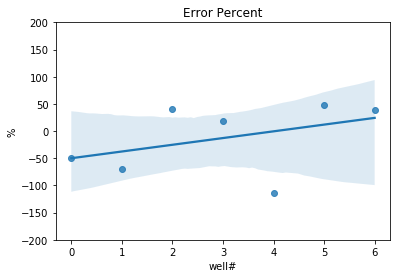

In [61]:
#calculate error percent
error_test_percent = ((y_test[:, 0] - y_pred[:, 0]) / y_test[:, 0]) * 100
df_error_test_percent = pd.DataFrame({'Test Error Percent': error_test_percent})

#plot
ax = sns.regplot(x= df_error_test_percent.index, y= df_error_test_percent)
ax.set(xlabel = 'well#', ylabel = '%') # add label
ax.set_title('Error Percent')
ax.set(ylim=(-200, 200))